Step 1: Import Qiskit and Other Necessary Libraries

In [94]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [96]:
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ

In [97]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator


Step 2: Initialize the Quantum Simulator

In [98]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')


Step 3: Prepare the Initial State

In [99]:
# Create a Quantum Circuit with 5 qubits for the code and 4 ancillas for the error detection
qc = QuantumCircuit(9, 5)  # 5 qubits for state, 4 ancilla qubits for error detection, 4 classical bits for measurement


In [100]:
print(qc)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
q_8: 
     
c: 5/
     


Step 4: Encoding the Logical Qubit(Encoding the logical qubit |0> into 5 physical qubits)


In [101]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)
qc.barrier()


In [102]:
print(qc)

                          ░ 
q_0: ──■────■────■────■───░─
     ┌─┴─┐  │    │    │   ░ 
q_1: ┤ X ├──┼────┼────┼───░─
     └───┘┌─┴─┐  │    │   ░ 
q_2: ─────┤ X ├──┼────┼───░─
          └───┘┌─┴─┐  │   ░ 
q_3: ──────────┤ X ├──┼───░─
               └───┘┌─┴─┐ ░ 
q_4: ───────────────┤ X ├─░─
                    └───┘ ░ 
q_5: ─────────────────────░─
                          ░ 
q_6: ─────────────────────░─
                          ░ 
q_7: ─────────────────────░─
                          ░ 
q_8: ─────────────────────░─
                          ░ 
c: 5/═══════════════════════
                            


Step 5: Introduce a Bit-flip Error.
*We will introduce an error manually in the simulator to test the code.
*Let's say the error occurs on the 3rd qubit

In [103]:
qc.x(2)  # This applies a bit-flip error to the third qubit
qc.barrier()


In [104]:
print(qc)

                          ░       ░ 
q_0: ──■────■────■────■───░───────░─
     ┌─┴─┐  │    │    │   ░       ░ 
q_1: ┤ X ├──┼────┼────┼───░───────░─
     └───┘┌─┴─┐  │    │   ░ ┌───┐ ░ 
q_2: ─────┤ X ├──┼────┼───░─┤ X ├─░─
          └───┘┌─┴─┐  │   ░ └───┘ ░ 
q_3: ──────────┤ X ├──┼───░───────░─
               └───┘┌─┴─┐ ░       ░ 
q_4: ───────────────┤ X ├─░───────░─
                    └───┘ ░       ░ 
q_5: ─────────────────────░───────░─
                          ░       ░ 
q_6: ─────────────────────░───────░─
                          ░       ░ 
q_7: ─────────────────────░───────░─
                          ░       ░ 
q_8: ─────────────────────░───────░─
                          ░       ░ 
c: 5/═══════════════════════════════
                                    


Step 6: Error Detection. # Error detection using ancilla qubits

In [105]:
qc.cx(0, 5)
qc.cx(1, 5)
qc.cx(1, 6)
qc.cx(2, 6)
qc.cx(2, 7)
qc.cx(3, 7)
qc.cx(3, 8)
qc.cx(4, 8)
qc.barrier()


In [106]:
print(qc)

                          ░       ░                                          ░ 
q_0: ──■────■────■────■───░───────░───■──────────────────────────────────────░─
     ┌─┴─┐  │    │    │   ░       ░   │                                      ░ 
q_1: ┤ X ├──┼────┼────┼───░───────░───┼────■────■────────────────────────────░─
     └───┘┌─┴─┐  │    │   ░ ┌───┐ ░   │    │    │                            ░ 
q_2: ─────┤ X ├──┼────┼───░─┤ X ├─░───┼────┼────┼────■────■──────────────────░─
          └───┘┌─┴─┐  │   ░ └───┘ ░   │    │    │    │    │                  ░ 
q_3: ──────────┤ X ├──┼───░───────░───┼────┼────┼────┼────┼────■────■────────░─
               └───┘┌─┴─┐ ░       ░   │    │    │    │    │    │    │        ░ 
q_4: ───────────────┤ X ├─░───────░───┼────┼────┼────┼────┼────┼────┼────■───░─
                    └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ 
q_5: ─────────────────────░───────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░─
                          ░       ░ └───

Step 7: Measure Ancillas to Extract Error Syndrome.# Measure the ancilla qubits to get the error syndrome

In [107]:
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)


In [108]:
print(qc)

                          ░       ░                                          ░ »
q_0: ──■────■────■────■───░───────░───■──────────────────────────────────────░─»
     ┌─┴─┐  │    │    │   ░       ░   │                                      ░ »
q_1: ┤ X ├──┼────┼────┼───░───────░───┼────■────■────────────────────────────░─»
     └───┘┌─┴─┐  │    │   ░ ┌───┐ ░   │    │    │                            ░ »
q_2: ─────┤ X ├──┼────┼───░─┤ X ├─░───┼────┼────┼────■────■──────────────────░─»
          └───┘┌─┴─┐  │   ░ └───┘ ░   │    │    │    │    │                  ░ »
q_3: ──────────┤ X ├──┼───░───────░───┼────┼────┼────┼────┼────■────■────────░─»
               └───┘┌─┴─┐ ░       ░   │    │    │    │    │    │    │        ░ »
q_4: ───────────────┤ X ├─░───────░───┼────┼────┼────┼────┼────┼────┼────■───░─»
                    └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ »
q_5: ─────────────────────░───────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░─»
                          ░ 

Step 8: Execute the Circuit on the Simulator.# Execute the circuit on the qasm simulator

In [109]:
job = execute(qc, simulator, shots=1024)


Step 9: Grab Results from the Job.# Get the counts (how many times each result occurred).# Plot the histogram

{'00110': 1024}


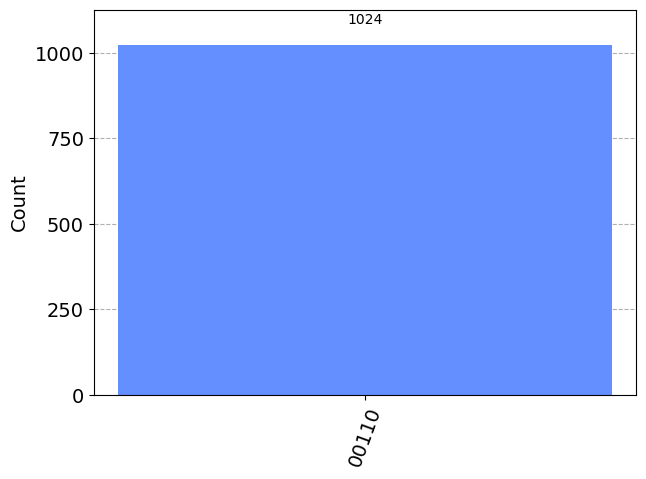

In [110]:
result = job.result()

counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)


In [111]:
print(qc)

                          ░       ░                                          ░ »
q_0: ──■────■────■────■───░───────░───■──────────────────────────────────────░─»
     ┌─┴─┐  │    │    │   ░       ░   │                                      ░ »
q_1: ┤ X ├──┼────┼────┼───░───────░───┼────■────■────────────────────────────░─»
     └───┘┌─┴─┐  │    │   ░ ┌───┐ ░   │    │    │                            ░ »
q_2: ─────┤ X ├──┼────┼───░─┤ X ├─░───┼────┼────┼────■────■──────────────────░─»
          └───┘┌─┴─┐  │   ░ └───┘ ░   │    │    │    │    │                  ░ »
q_3: ──────────┤ X ├──┼───░───────░───┼────┼────┼────┼────┼────■────■────────░─»
               └───┘┌─┴─┐ ░       ░   │    │    │    │    │    │    │        ░ »
q_4: ───────────────┤ X ├─░───────░───┼────┼────┼────┼────┼────┼────┼────■───░─»
                    └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ »
q_5: ─────────────────────░───────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░─»
                          ░ 

C:\Users\pc\AppData\Local\Temp\ipykernel_16220\3307250934.py:16: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_corrected = simulator.run(qobj_corrected).result()


Corrected Counts:
{'00000': 1024}


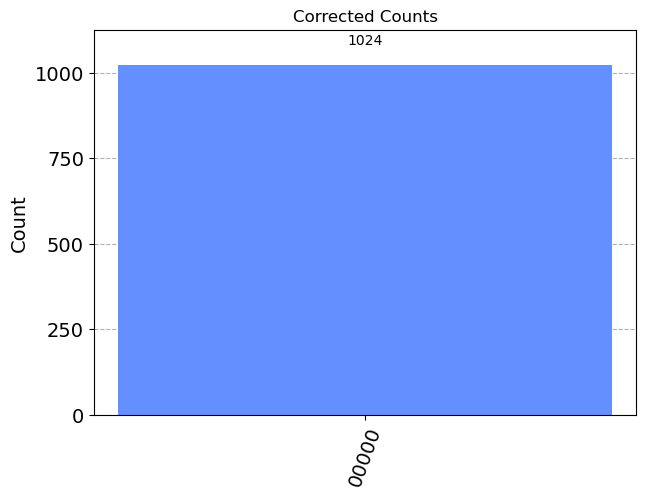

In [112]:
#error correction circuit for simulator
from qiskit import QuantumCircuit, Aer, transpile, assemble


# Error Correction
qc.barrier()
qc.x(2).c_if(qc.clbits[0], 0).c_if(qc.clbits[1], 1).c_if(qc.clbits[2], 1).c_if(qc.clbits[3], 0)

# Measure data qubits into separate classical bits
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])

# Simulate the corrected circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_corrected_qc = transpile(qc, simulator)
qobj_corrected = assemble(transpiled_corrected_qc)
result_corrected = simulator.run(qobj_corrected).result()

# Get the corrected counts
corrected_counts = result_corrected.get_counts(qc)
print("Corrected Counts:")
print(corrected_counts)
plot_histogram(corrected_counts, title="Corrected Counts")

In [113]:
print(qc)

                          ░       ░                                          ░ »
q_0: ──■────■────■────■───░───────░───■──────────────────────────────────────░─»
     ┌─┴─┐  │    │    │   ░       ░   │                                      ░ »
q_1: ┤ X ├──┼────┼────┼───░───────░───┼────■────■────────────────────────────░─»
     └───┘┌─┴─┐  │    │   ░ ┌───┐ ░   │    │    │                            ░ »
q_2: ─────┤ X ├──┼────┼───░─┤ X ├─░───┼────┼────┼────■────■──────────────────░─»
          └───┘┌─┴─┐  │   ░ └───┘ ░   │    │    │    │    │                  ░ »
q_3: ──────────┤ X ├──┼───░───────░───┼────┼────┼────┼────┼────■────■────────░─»
               └───┘┌─┴─┐ ░       ░   │    │    │    │    │    │    │        ░ »
q_4: ───────────────┤ X ├─░───────░───┼────┼────┼────┼────┼────┼────┼────■───░─»
                    └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ »
q_5: ─────────────────────░───────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░─»
                          ░ 

From step 9: The counts is giving the error syndrome. Error Syndrome means the pattern of errors, identifies the bit in error. If all parity bits are correct, there is no error. Otherwise, the sum of the positions of the erroneous parity bits identifies the erroneous bit, which we can analyze to see if the error correction was successful.

Step 10: Access Quantum Hardware (For Real Quantum Hardware Execution).# Load IBM Q account and get the least busy backend device

In [63]:
pip install qiskit-ibmq-provider


In [64]:
# Load your IBM Q account
from qiskit import IBMQ

IBMQ.save_account('0c5b2835672517fb24d1ecd812570bac90ef6628b742d93906192c0a587d2ef0511a7e51bb9bc3c4530949c2ef46a084a88054a29e0a5ff2ad84c82fbad76cb7', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
ibmbrisbane_backend = provider.get_backend('ibm_brisbane')

ibmqfactory.load_account:WARNING:2023-11-21 12:47:50,236: Credentials are already in use. The existing account in the session will be replaced.


In [67]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load your IBM Q account
IBMQ.load_account()

# Get the provider for IBM Q
provider = IBMQ.get_provider(hub='ibm-q')

# Filter backends that are operational and have at least 5 qubits
backends = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                             and not x.configuration().simulator
                             and x.status().operational==True)

# Find the least busy backend
least_busy_backend = least_busy(backends)
print("Least busy backend:", least_busy_backend)


ibmqfactory.load_account:WARNING:2023-11-21 12:49:21,978: Credentials are already in use. The existing account in the session will be replaced.


Least busy backend: ibm_brisbane


In [44]:
from qiskit import IBMQ

# Load IBM Q account
IBMQ.load_account()

# Get the provider and backend
provider = IBMQ.get_provider(hub='ibm-q')
ibmbrisbane_backend = provider.get_backend('ibm_brisbane')

# Check the backend status
status = ibmbrisbane_backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Operational: {is_operational}")
print(f"Jobs in queue: {jobs_in_queue}")


ibmqfactory.load_account:WARNING:2023-11-21 11:29:05,882: Credentials are already in use. The existing account in the session will be replaced.


Operational: True
Jobs in queue: 54


In [23]:
from qiskit import IBMQ

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

# List all available backends
for backend in provider.backends():
    print(backend.name())


ibmqfactory.load_account:WARNING:2023-11-20 18:56:29,540: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_lagos
ibm_nairobi
ibm_perth
ibm_brisbane


Step 12: Execute on Real Quantum Hardware

In [ ]:
# from qiskit import IBMQ

# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')

# # List all available backends with their number of qubits
# for backend in provider.backends():
#     print(backend.name(), "has", backend.configuration().n_qubits, "qubits")


In [24]:
from qiskit import QuantumCircuit, transpile
from qiskit.tools.monitor import job_monitor

#State Initialisation
qc_detect = QuantumCircuit(9, 4)
qc_detect.initialize([1, 0], 0)

#Encoding using CX gate from 0 to 00000 as for 5-Qubit
qc_detect.cx(0, 1)
qc_detect.cx(0, 2)
qc_detect.cx(0, 3)
qc_detect.cx(0, 4)
qc_detect.barrier()

# Introduce a bit flip error on the third qubit
qc_detect.x(2)
qc_detect.barrier()

#Syndrome measurement pairs
qc_detect.cx(0, 5)
qc_detect.cx(1, 5)
qc_detect.cx(1, 6)
qc_detect.cx(2, 6)
qc_detect.cx(2, 7)
qc_detect.cx(3, 7)
qc_detect.cx(3, 8)
qc_detect.cx(4, 8)
qc_detect.barrier()

#Measure the ancilla qubits to get the error syndrome
qc.measure(5, 0)
qc.measure(6, 1)
qc.measure(7, 2)
qc.measure(8, 3)

# Transpile for the real quantum device
transpiled_qc_detect = transpile(qc_detect, ibmbrisbane_backend)

# Specify the number of shots
num_shots = 1024

# Submitting the job to the real quantum device
job_detect = ibmbrisbane_backend.run(transpiled_qc_detect,shots=num_shots)
job_monitor(job_detect)

# Retrieve and print the result
result_detect = job_detect.result()
error_counts_detect = result_detect.get_counts(qc_detect)
print("Error Detection Counts on Real Quantum Computer for 5-Qubit:")
print(error_counts_detect)


Job Status: job has successfully run
Error Detection Counts on Real Quantum Computer for 5-Qubit:
{'0000': 1024}


Step 13: Visualize the Results

In [ ]:
plot_histogram(error_counts)


Erroc Detection was successfully done in the above . now this part will be done for the  Error Correction

Step 13: Interpret the Syndrome (Classical Post-processing)

In [ ]:
# # This is a placeholder for the syndrome that you would get from the quantum computer
# # For example, '0010' might indicate a bit-flip error on the second qubit
# First, we'll map each syndrome to a correction operation. The mapping will depend on the error detection scheme used:

# '1001': Error on Qubit 1 or Qubit 5
# '0011': Error on Qubit 4
# '0101': Error on Qubit 2 or Qubit 5
# '1110': Error on Qubit 1 or Qubit 4
# '0010': Error on Qubit 4
# '0111': Error on Qubit 3 or Qubit 5
# '0100': Error on Qubit 3
# '1000': Error on Qubit 1
# '1011': Error on Qubit 1 or Qubit 5
# '1100': Error on Qubit 1 or Qubit 3
# '0001': Error on Qubit 5
# '0110': Error on Qubit 2 or Qubit 4
# '1101': Error on Qubit 1 or Qubit 2
# '1111': Error on multiple qubits or a more complex error


**Step 14: Create a New Quantum Circuit for Each Syndrome**.We will create a dictionary of circuits for each syndrome to apply the necessary corrections.

In [ ]:
error_counts.keys()

dict_keys(['1001', '0011', '0101', '1110', '0010', '0111', '0100', '0000', '1000', '1011', '1100', '0001', '0110', '1101', '1111', '1010'])

In [ ]:
error_counts.items()

dict_items([('1001', 663), ('0011', 76), ('0101', 37), ('1110', 5), ('0010', 76), ('0111', 14), ('0100', 255), ('0000', 2107), ('1000', 278), ('1011', 34), ('1100', 91), ('0001', 157), ('0110', 65), ('1101', 102), ('1111', 24), ('1010', 16)])

In [ ]:
# Create a new quantum circuit for the correction
correction_circuit = QuantumCircuit(5)  # only the 5 data qubits, no ancillas needed here


NameError: ignored

In [ ]:
# Apply the correction
if '0100' in error_counts:
    correction_circuit.x(2)  # Apply X gate to correct the error at Qubit 3


In [ ]:
transpiled_correction_circuit = transpile(correction_circuit, brisbane_backend)


In [ ]:
correction_job = brisbane_backend.run(transpiled_correction_circuit)
job_monitor(correction_job)


In [ ]:
correction_results = correction_job.result()
correction_counts = correction_results.get_counts(correction_circuit)


In [ ]:
plot_histogram(correction_counts)


In [ ]:
# correction_circuits = {}
# for syndrome, count in error_counts.items():
#     if syndrome != '0000':  # '0000' indicates no error
#         circuit = QuantumCircuit(5)
#         if syndrome[-1] == '1':
#             circuit.x(4)
#         if syndrome[-2] == '1':
#             circuit.x(3)
#         if syndrome[-3] == '1':
#             circuit.x(2)
#         if syndrome[-4] == '1':
#             circuit.x(1)
#         # Add the circuit to the dictionary
#         correction_circuits[syndrome] = circuit


**Step 15: Transpile the Correction Circuit for the Backend.**

In [ ]:
transpiled_correction_circuits = {syn: transpile(circuit, brisbane_backend) for syn, circuit in correction_circuits.items()}


**Step 16: Execute the Correction Circuits on the Quantum Hardware**.Submit the transpiled correction circuits to the backend.

In [ ]:
correction_jobs = {syn: brisbane_backend.run(trans_circ) for syn, trans_circ in transpiled_correction_circuits.items()}


IBMQBackendApiError: ignored

In [ ]:
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.providers.ibmq import IBMQBackendApiError
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
brisbane_backend = provider.get_backend('ibm_brisbane')

# Check a single transpiled circuit
syndrome = '0100'
correction_circuit = QuantumCircuit(5)
correction_circuit.x(2)  # Example correction for demonstration
correction_circuit.measure_all()  # Make sure to measure the qubits

transpiled_circuit = transpile(correction_circuit, brisbane_backend)
print(transpiled_circuit)  # Verify the transpiled circuit

# Submit a minimal working example
try:
    job = brisbane_backend.run(transpiled_circuit)
    job_monitor(job)
    results = job.result()
    counts = results.get_counts()
    print(counts)
except IBMQBackendApiError as e:
    print(f"An error occurred when submitting the job: {e}")


ibmqfactory.load_account:WARNING:2023-11-09 22:54:18,843: Credentials are already in use. The existing account in the session will be replaced.


                         ░ ┌─┐            
          q_0 -> 0 ──────░─┤M├────────────
                         ░ └╥┘┌─┐         
          q_1 -> 1 ──────░──╫─┤M├─────────
                   ┌───┐ ░  ║ └╥┘┌─┐      
          q_2 -> 2 ┤ X ├─░──╫──╫─┤M├──────
                   └───┘ ░  ║  ║ └╥┘┌─┐   
          q_3 -> 3 ──────░──╫──╫──╫─┤M├───
                         ░  ║  ║  ║ └╥┘┌─┐
          q_4 -> 4 ──────░──╫──╫──╫──╫─┤M├
                         ░  ║  ║  ║  ║ └╥┘
    ancilla_0 -> 5 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
    ancilla_1 -> 6 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
    ancilla_2 -> 7 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
    ancilla_3 -> 8 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
    ancilla_4 -> 9 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
   ancilla_5 -> 10 ─────────╫──╫──╫──╫──╫─
                            ║  ║  ║  ║  ║ 
   ancilla_

**Step 17: Monitor Job Execution and Retrieve the Results**.Use the job_monitor function to track the execution of each job and retrieve the results once completed.

In [ ]:
correction_results = {}
for syn, job in correction_jobs.items():
    job_monitor(job)
    correction_results[syn] = job.result().get_counts()


**Step 19: Analyze the Correction Results**

In [ ]:
for syn, counts in correction_results.items():
    print(f"Correction for syndrome {syn}:")
    print(counts)
    plot_histogram(counts)
